In [ ]:
import sympy as sp
from dtumathtools import *

sp.init_printing()
x, y, z, x1, x2, x3, u, v, t = sp.symbols("x,y,z,x1,x2,x3,u,v,t")


def inner(x1: sp.Matrix, x2: sp.Matrix):
    """
    Computes the inner product of two vectors of same length.
    """

    return x1.dot(x2, conjugate_convention="right")


sp.MutableDenseMatrix.inner = inner
sp.ImmutableDenseMatrix.inner = inner

In [ ]:
# definer din funktion, eksempelvis
f = sp.exp(sp.sin(x))

# definer hvor mange led og hvilken grad taylor serien skal udvides til (n). indsæt dit n for at få n'te grads polynomiet
# definer udviklingspunktet, typisk x0 = 0

n = 5
x0 = 0

# Taylor serien op til n'te led fås ved. Her udvikles f(x) i forhold til variablen x
# sp.series skal bare have n+1 led
taylor = sp.series(f, x, x0, n + 1)

taylor

$O(x^6) = \epsilon(x)*x^5$ 

In [ ]:
# plot en funktion og alle dens taylor approximationer op til n

# første plot
pl = sp.plot(f, xlim=(-3, 3), ylim=(-3, 3), show=False, legend=True)

# laver alle taylor approximationer og plotter dem
for K in range(n):
    newseries = sp.series(f, x, x0, K + 1).removeO()
    display(sp.Eq(sp.Function(f"P_{K}")(x), newseries))
    newplot = sp.plot(newseries, label=f"n = {K}", show=False)
    pl.extend(newplot)

pl.show()

Domænet af en funktion kan ikke findes ved en script. Man må tænke sig frem til hvilke værdier ikke er gyldige. F.eks. hvis

$ f : \mathbb{R} -> \mathbb{R}$ er givet ved $f(x) = sqrt(x)$, kan x selvfølgelig ikke være under 0, da "resultatet" så ville være udenfor $\mathbb{R}$


##### Restfunktion $R_n(x)$

For simplere opgaver er den bedste formel givet ved 4.10 i bogen.

For sværere opgaver fås den bedste formel du finder i bogen ved 4.11, så her vil jeg bare forklare hvad det underlige E (kaldt Xi), x og K er.

Fordi taylorapproximationer er doodoo langt væk fra dit startpunkt/udviklingspunkt = x0, udregner vi "hvor gal" den er på med restfunktionen.

K er hvor meget du har udviklet din taylorapproximation (n i opgaven ovenover), x0 er dit startpunkt, og her skal du indsætte x for at finde fejlen i punktet x. Så hvis du gerne vil finde ud af hvor meget din approximation afviger fra det rigtige resultat i x = 6, så indsæt x = 6 i formlen 4.11.

Herefter findes der en Xi mellem værdierne x og x0 som er "den rigtige xi". Hvis x0 = 3 og x = 6, så gennnemløber du Xi mellem 3 og 6, og hvad en der giver den højeste værdi er for realsies din fejl i punktet x = 6, og også den største fejl.

Hvis du gennemløber Xi og finder den mindste værdi er det den "mindste fejl" i punktet x = 6.


3c i store dags opgaver er en omskrivning af formlen 4.11 i bogen efter man har indsat at f = sqrt(2x-1).

##### 4c i store dags opgaver

Facit er dybt seriøst fordi det er nemmere at udregne cos(0) og sin(2*0) end cos(pi/2) og sin(pi/2). Det vil man også finde ud af når man laver udledningen i hånden.

#### 4d i store dags opgaver

Vi har en funktion f(x) og dens taylor approximation P(x). Vi vil gerne finde ud af, for en given x, hvornår forskellen mellem f(x) og P(x) i det punkt er mindre end f.eks. 1/100

In [ ]:
# Definer f, og hvilket punkt vi finder "forskellen i". x_diff_point skal være ét tal.
# vælg også udviklingspunkt x0.
f = sp.sin(x)
x_diff_point = 1
difference = 0.01
x0 = 0

# 15 valgt arbitrært, hvis man skal højere op end det har du nok fucket op.
for n in range(15):

    print(f"Taylor at degree {n}")
    taylor = sp.series(f, x, x0, n + 1)

    print(f"Taylor polynomial is p(x) = {taylor.removeO()}")
    print(
        f"Diff between function at x= {x_diff_point} and polynomial at x= {x_diff_point} is"
    )
    diff = taylor.removeO().subs({x: x_diff_point}) - f.subs({x: x_diff_point})

    print(diff.evalf())
    print()
    if abs(diff.evalf()) < difference:
        break

### taylor approximation for funktion af 2 variable

In [ ]:
# definer f
f = sp.sin(x) * sp.sin(y) + sp.cos(z)

# f er din funktion, [x,y] er dine to variable, 5 er graden af taylor approximationen
dtutools.taylor(f, [x, y], 5)

### taylor approximation for funktion af flere variable

se noternes 4.5.1

Her er en funktion fra noterne - du kan kigge på den for at fatte taylor lidt mere, men også like who cares


In [ ]:
def taylor_notes(f, K, x0):
    Pk = 0
    for k in range(K + 1):
        # Udregn den k'te afledte af f i x0
        fk = diff(f, x, k).subs({x: x0})
        # Læg det k'te led til approksimationen
        Pk += fk / sp.factorial(k) * (x - x0) ** k
    return Pk


def evaluateFunction(f, x, x0):
    for i in range(len(x)):
        f = f.subs({x[i]: x0[i]})
    return f


# nedenstående funktion er ret cool, men ikke lige så cool som min
def taylorN(f, x, x0):
    N = len(x)
    # Konstant-led
    const = evaluateFunction(f, x, x0)
    # Førstegrads-led
    J = sp.Matrix([f]).jacobian(x)
    J0 = evaluateFunction(J, x, x0)
    first = J0 * (x - x0)
    # Andengrads-led
    H = dtutools.hessian(f, x)
    H0 = evaluateFunction(H, x, x0)
    second = 1 / 2 * (x - x0).T * H0 * (x - x0)
    # Resultat
    Pk = sp.simplify(sp.Matrix([const]) + first + second)[0]
    return Pk

In [ ]:
# Tag note af at der arbejdes med reele tal. Du kan godt fjerne real = true hvis du har lyst :) it totally still works
x, y, z, x1, x2, x3, u, v, t = sp.symbols("x,y,z,x1,x2,x3,u,v,t", real=True)

# definer f. Her er f(x,y,z)
f = sp.exp((x1 * x2) + x2 * sp.sin(x3))

# Definer hvilken grad du gerne vil lave taylor approximationen til n= 1 eller n = 2. ikke noget andet!!
n = 2

# hvis n = 2, vil nedenstående funktion være god nok. Sæt x_input som en vektor af dine variabler i f
# og x0 som en vektor der er dit udviklingspunkt.

x_input = sp.Matrix([x1, x2, x3])

x0 = sp.Matrix([0, 0, 0])
print("funktion fra noterne:")
display(taylorN(f, x_input, x0))

# Eller, hvis du gerne vil gøre det meget manuelt, se nedestående
# Definer dit startpunkt, ikke sjældent at x0 udtrykker en vektor der er startpunktet, og at vektoren er [0,0,0,0...]
# Udtryk startpunktet for hver af variablerne

# hvis du får at vide at x0 = [0,0,0], så indsæt således. Hvis x0 = [1,0,2], så indsæt x0 = 1, y0 = 0, z0 = 2


# modificer nedenstående hvis du har flere eller færre variabler
x0 = sp.Matrix([3, 0, sp.Rational(1, 2) * -sp.pi])

f_x0 = f.subs({x1: x0[0], x2: x0[1], x3: x0[2]})

x_in_taylor = sp.Matrix([x1, x2, x3])

nabla_f_x0 = dtutools.gradient(f).subs({x1: x0[0], x2: x0[1], x3: x0[2]})

hessian_x0 = dtutools.hessian(f).subs({x1: x0[0], x2: x0[1], x3: x0[2]})

# P1 defineres
P = f_x0 + (x_in_taylor - x0).inner(nabla_f_x0)

if n == 2:
    P += sp.Rational(1, 2) * (x_in_taylor - x0).inner(hessian_x0 * (x_in_taylor - x0))

print()
print("Hjemmelavet funktion")
display(P.simplify())
display(P.evalf())
display(P)

In [ ]:
# Taylor approximationen i punktet [0.1,0.2,2]

point = sp.Matrix([0.1, 0.2, 2])

P.subs({x: point[0], y: point[1], z: point[2]})

In [ ]:
# Absolutte fejl er givet ved

sp.Abs(
    f.subs({x: point[0], y: point[1], z: point[2]})
    - P.subs({x: point[0], y: point[1], z: point[2]})
)

#### Vis det er taylor approximationen for $\mathbb{R^n} -> \mathbb{R}$ er en kvadratisk form

følg exercise 4.5.2 i bogen. 

Vi skal vise at $p_2(x)$ kan skrives på formen $x.T*A*x + x.T*b + c$, hvor A er en matrix, og b er en vektor (hvor størrelserne passer så de kan ganges sammen yk)

Fra def 4.5.1 (formel 4.25) kan vi se at

$x = (x-x0)$
x i vores kvadratiske form = koordinaterne for punktet x (x,y,z eller x1,x2,x3) - x0 (udviklingspunkt)

$c = f(x0)$

$b = nabla(f(x0))$

$A = 1/2 * Hessian_f(x_0)$

In [ ]:
# Indsæt din funktion, dit udviklingspunkt, og dine variabler
f = sp.sin(x) + sp.sin(y)
x0 = sp.Matrix(
    [
        0,
        1,
        0,
    ]
)

# x,y,z kunne også være x1,x2,x3 selvfølgelig. Så erstat sympy symbolerne i matrixen.
variables = sp.Matrix([x, y, z])

# udregninger er nedenstånede

f_x0 = evaluateFunction(f, variables, x0)

x_point = variables - x0
nabla_f = dtutools.gradient(f, variables)
print("gaming")
nabla_f_x0 = evaluateFunction(nabla_f, variables, x0)

hessian_f = dtutools.hessian(f, variables)
hessian_f_x0 = evaluateFunction(hessian_f, variables, x0)

c = f_x0
b = nabla_f_x0
a = sp.Rational(1, 2) * hessian_f_x0

print(f"A = ")
display(a)
print(f"b = ")
display(b)
print(f"c = ")
display(c)
print(f"x = ")
display(x_point)

print(f"Husk at P2(x) = x.T*A*x + x.T*b + c")

#### find taylor approximation ud fra at du kan bestemte værdier i den differentiable funktion
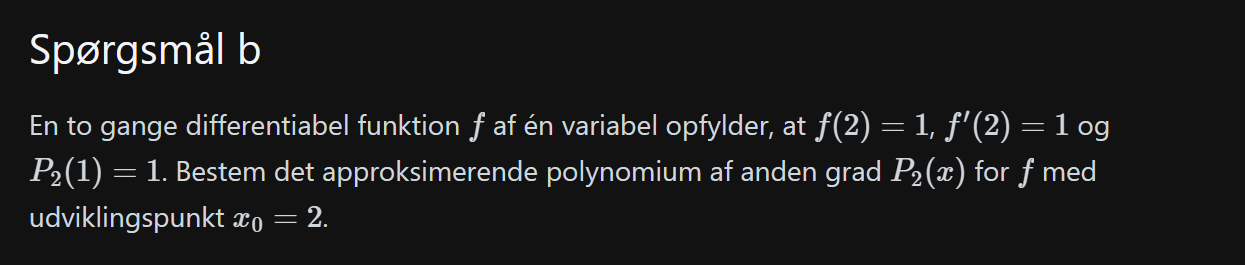

In [ ]:
# indtast x0 (i  opgaven er det 2 fordi vi har f(2) og f'(2))
x0 = 2

# indtast værdier, her er det [1,1] fordi f(2) = 1 og f'(2) = 1. Hvis vi fik at vide at f''(2) = 4 ville vi indtaste [1,1,4].
# Hvis vi fik at vide at f'''(3) = 5 ville vi ikke gøre noget, for vi kan ikke bruge f''(3) når resten af dem er i f(2) og f'(2)

# vi bruger 4.16
values = [1, 1]

p = 0
deg = 0

for i in range(len(values)):
    deg += 1
    value = values[i]
    p += (value / sp.factorial(i)) * (x - x0) ** i

print(f"restprodukt er epsilon(x)*x^{deg-1} eller O(x^{deg})")
print(f"taylor approximation til grad {deg-1} = p(x) = ({p})")
print()
print(f"Det sidst led ved vi er i formattet (x-a)^{deg}. Find så a for at p2(1) = 1")

#### find grænseværdien for følgende
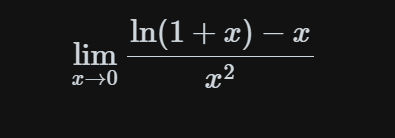

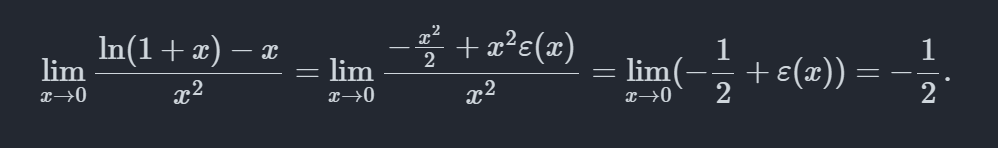

der er ingen metode. Bliv ved med at udvide dit udtryk med taylor indtil du kan få noget til at gå ud

In [ ]:
f = sp.log(1 + x) - x
p2 = sp.series(f, x, 0, 3)
p2

noter at O($x^3$) = epsilon(x)*$x^2$

##### andet eksempel

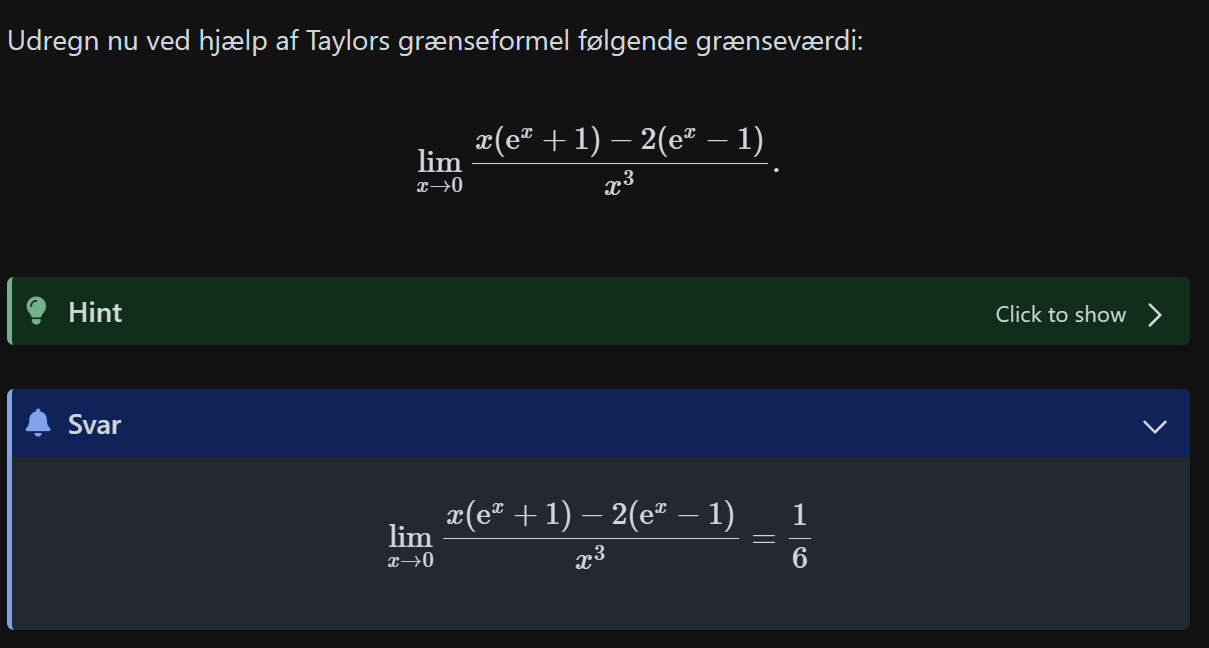

In [ ]:
f = x * (sp.exp(x) + 1) - 2 * (sp.exp(x) - 1)
p3 = sp.series(f, x, 0, 4)
p3

igen er O($x^4$) = epsilon(x)*$x^3$


så det der står ovenover ($x*(e^x+1)-2(e^x-1)$) er altså lig $x^3/6 + \epsilon(x)*x^3$

så der fås $\lim_{x->0} \frac{x^3/6 + \epsilon(x^3)}{x^3} = \frac{1}{6}+\epsilon(x)$

epsilon(x) går altid mod 0 når x går mod 0, så der fås bare 1/6


Note: om en forskel er signifikant

Det er på din vurdering. Størrelsenorden 10^-5 meter er selvfølgelig stort for molekyler, men ikke hvis vi måler højden af et menneske you know.

find relativ og absolut difference